# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 3</font>

***

## Trabalho sobre testes de hipóteses

Utilizando os conhecimentos adquiridos em nosso treinamento realize o teste de hipóteses proposto abaixo.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais testes interessantes que podem ser realizados com o nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [3]:
import pandas as pd
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [4]:
df = pd.read_csv(r'C:\Users\LMMARTINHO\Documents\Courses\Statistics\dados.csv')

### Visualize o conteúdo do DataFrame

In [5]:
print(df)

       UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
0      11     0     23    8              12    800  1.603808
1      11     1     23    2              12   1150  1.739790
2      11     1     35    8              15    880  1.760444
3      11     0     46    2               6   3500  1.783158
4      11     1     47    8               9    150  1.690631
...    ..   ...    ...  ...             ...    ...       ...
76835  53     1     46    2              11    812  1.687030
76836  53     0     30    4               7   1500  1.792934
76837  53     0     32    8              12   1300  1.830587
76838  53     0     57    8               4   1500  1.726344
76839  53     0     38    8               4    900  1.658305

[76840 rows x 7 columns]


## <font color='red'>Problema</font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

---

### Seleção das amostras

In [39]:
amostra_RJ = df[df['UF'] == 33].sample(n = 500, random_state=101)

In [38]:
amostra_SP = df[df['UF'] == 35].sample(n = 500, random_state=101)

### Dados do problema
Obter média e desvio-padrão para as duas amostras

In [8]:
media_amostra_RJ = amostra_RJ['Renda'].mean()

In [9]:
dp_amostra_RJ = amostra_RJ['Renda'].std()

In [10]:
media_amostra_SP = amostra_SP['Renda'].mean()

In [11]:
dp_amostra_SP = amostra_SP['Renda'].std()

<Axes: >

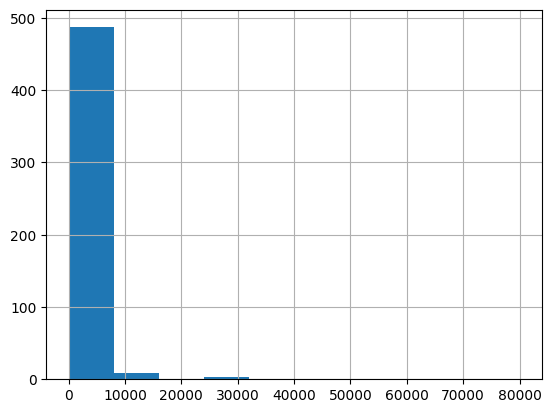

In [12]:
amostra_RJ['Renda'].hist()

## Lembre-se...

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

(Formule suas hipóteses aqui)

H0 : media_rj >= media_sp
H1: media_rj < media_sp

ou

H0: media_rj - media_sp >= 0
H1: media_rj - media_sp < 0

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Não

### O desvio padrão populacional é conhecido?
#### Resp.: Não


<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [13]:
## Como n > 30 (500), podemos usar o teste z.

alpha = 0.05
confianca = 1 - alpha

In [45]:
from scipy.stats import norm 
z_alpha = - norm.ppf(confianca)
z_alpha

np.float64(-1.6448536269514722)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

In [46]:
z_est_teste = ( (media_amostra_RJ - media_amostra_SP) - 0 ) / ( np.sqrt ( (dp_amostra_SP**2)/ 500  + (dp_amostra_RJ **2)/500 ))
z_est_teste


np.float64(-2.255318273608558)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

### <font color='red'>Critério do valor crítico</font>

In [48]:
z_est_teste <= z_alpha

#Logo, rejeito H0.

np.True_

### <font color='red'>Critério do valor $p$</font>

### Utilize DescrStatsW

In [18]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [27]:
test_RJ = DescrStatsW(amostra_RJ)
test_SP = DescrStatsW(amostra_SP)

In [49]:
teste = test_RJ.get_compare(test_SP)

In [53]:
z, p_valor = teste.ztest_ind(alternative='smaller', value = 0)
z

c:\Users\LMMARTINHO\Documents\Courses\venv\Lib\site-packages\statsmodels\stats\weightstats.py:748: RuntimeWarning: divide by zero encountered in divide
  zstat = (value1 - value2 - diff) / std_diff


array([       -inf,  2.21748892, -0.75758776,  3.14470873,  0.81025   ,
       -2.25531827,  0.79749367])

### Utilize CompareMeans

In [55]:
test_2 = CompareMeans(test_RJ,test_SP)
z, p_valor = test_2.ztest_ind(alternative='smaller', value = 0)
p_valor

array([0.        , 0.98670515, 0.2243489 , 0.99916874, 0.79110175,
       0.01205668, 0.78741781])

### <font color='green'>Conclusão: (Digite sua conclusão aqui)</font>

Com o nível de significância de 0.05 concluímos que a renda média no estado do Rio de Janeiro é menor que a renda do estado de São Paulo.